In [1]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
#The dataset is in Excel File

file_path = "C:\\Users\\Maria\\OneDrive\\Desktop\\IABAC Project\\Employee_Dataset.xlsx"

#Load the dataset into a DataFrame

df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
# Check the columns of your DataFrame
print(df.columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [4]:
#Check the data types

print(df.dtypes)

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [5]:
#Check for duplicates

print(df.duplicated().sum())

0


In [6]:
#Summary Statistics for numerical columns

print(df.describe())

               Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.

In [7]:
# Check the columns of your DataFrame
print(df.columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [8]:
#Check for missing values

print(df.isnull().sum())

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


In [9]:
# Check the columns of your DataFrame
print(df.columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


VISUALIZATION


Text(0.5, 1.0, 'Age Histogram')

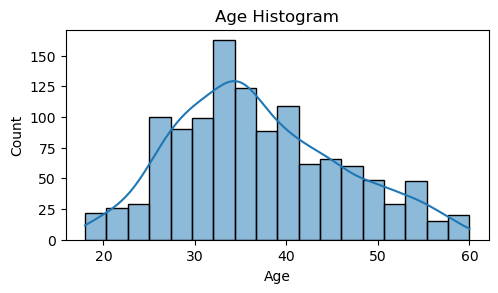

In [10]:
#Create a Histogram of Age

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df["Age"], kde=True)
plt.title("Age Histogram")

Text(0.5, 1.0, 'Boxplot of Distance From Home by Attrition')

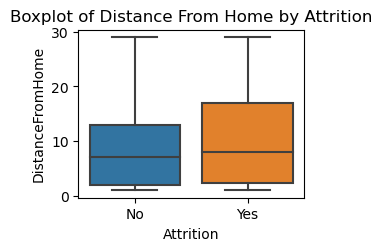

In [11]:
#BoxPlot of Distance From Home by Attrition

plt.subplot(2,2,2)
sns.boxplot(x="Attrition", y="DistanceFromHome",data=df)
plt.title("Boxplot of Distance From Home by Attrition")

Text(0.5, 1.0, 'Countplot of Employee Job Satisfaction ')

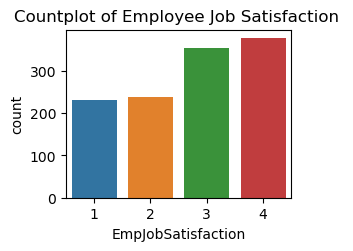

In [12]:
#Barchart of Job Satisfaction

plt.subplot(2,2,3)
sns.countplot(x="EmpJobSatisfaction", data=df)
plt.title("Countplot of Employee Job Satisfaction ")

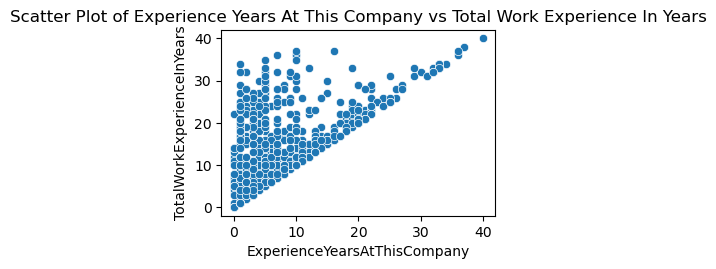

In [13]:
#Scatter plot of Years At Company vs Monthly Income

plt.subplot(2, 2, 4)
sns.scatterplot(x="ExperienceYearsAtThisCompany", y="TotalWorkExperienceInYears", data=df)
plt.title("Scatter Plot of Experience Years At This Company vs Total Work Experience In Years")
plt.tight_layout()
plt.show()

In [14]:
# Check the columns of your DataFrame
print(df.columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [15]:
#Explore categorical variables

for column in df.select_dtypes(include=["object"]):
    print(column)
    print(df[column].value_counts())
    print()

EmpNumber
EmpNumber
E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: count, Length: 1200, dtype: int64

Gender
Gender
Male      725
Female    475
Name: count, dtype: int64

EducationBackground
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

MaritalStatus
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

EmpDepartment
EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

EmpJobRole
EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Represe

In [16]:
# Check the columns of your DataFrame
print(df.columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [17]:
# Encode categorical columns using LabelEncoder
label_columns = ['Gender', 'OverTime', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'Attrition']
label_encoders = {}
for column in label_columns:
    if column != 'EmpNumber':
       label_encoders[column] = LabelEncoder()
       df[column] = label_encoders[column].fit_transform(df[column])

# Display the encoded DataFrame
print(df)


     EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
0     E1001000   32       1                    2              2   
1     E1001006   47       1                    2              2   
2     E1001007   40       1                    1              1   
3     E1001009   41       1                    0              0   
4     E1001010   60       1                    2              2   
...        ...  ...     ...                  ...            ...   
1195   E100992   27       0                    3              0   
1196   E100993   37       1                    1              2   
1197   E100994   50       1                    3              1   
1198   E100995   34       0                    3              2   
1199   E100998   24       0                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0                 5          13                        2                10   
1                 5          13        

In [18]:
# Rename columns after encoding
new_column_names = {}
for column in label_columns:
    new_column_names[column] = [f"{column}_encoded"]
    df.rename(columns={column: f"{column}_encoded"}, inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

  EmpNumber  Age  Gender_encoded  EducationBackground_encoded  \
0  E1001000   32               1                            2   
1  E1001006   47               1                            2   
2  E1001007   40               1                            1   
3  E1001009   41               1                            0   
4  E1001010   60               1                            2   

   MaritalStatus_encoded  EmpDepartment_encoded  EmpJobRole_encoded  \
0                      2                      5                  13   
1                      2                      5                  13   
2                      1                      5                  13   
3                      0                      3                   8   
4                      2                      5                  13   

   BusinessTravelFrequency_encoded  DistanceFromHome  EmpEducationLevel  ...  \
0                                2                10                  3  ...   
1                     

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['PerformanceRating','EmpNumber'],axis=1),
                                                    df['PerformanceRating'], test_size=0.2, random_state=42)


In [20]:
# Train the RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Make predictions
y_pred = clf.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


In [23]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}


In [24]:
# Use the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best model: {accuracy}")

Accuracy with best model: 0.9458333333333333
